In [1]:
# NOTE: running this cell can give you an error. If it is the case:
# before running this notebook, be sure to have installed the package ipympl on your environment
# if not, installed it and then restart the kernel (hopefully it works)

import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read
from scipy.signal import butter, filtfilt
from IPython.display import Audio

# Week 6 - Sound notebook
This notebook takes you through some of the basic aspects when analyzing sound. 

As a physical phenomenon, sound describes continuous change of air pressure. A discrete representation of the sound can be obtained using uniform sampling, such that the amplitude of the sound wave is measured in fixed intevals, typically at thousands of hertz. We can hence represent the sound wave as a time series.
Similarly, and any time series can be interpreted as a sound wave.


## Exercise 1): Fundamental harmonic sound
 The following code samples a simple sine-wave for six seconds, representing it as a digital signal; 

$$ f_d(n) = A \sin\left(2\pi\frac{F}{F_s}n + \theta\right)$$

  The code further plots the digital signal as a function of the sample number and allow you to play back the signal as an audio sequency (if you use headphones, make sure the volume is low, before you play the sound!).
  
- using 'zoom to rectangle' (below the plot), you should be able to zoom in on the signal to explore its nature. (if it dose not work try to plot part of the signal for example $fd[1:2000]$
- inspect the change in sound when changing the signal frequency $F$ (please be careful, the sound can be really annoying, so turn down the volumen of your headphone).
- verify that the signal will not be sampled correctly (and hence not play back correctly) if the sample frequency is too low.
- Modify the code to let the sampled signal be the sum of two sine-waves. Inspect the effect (of both the plot and sound) when  letting the sine-waves have different frequencies and amplitudes.

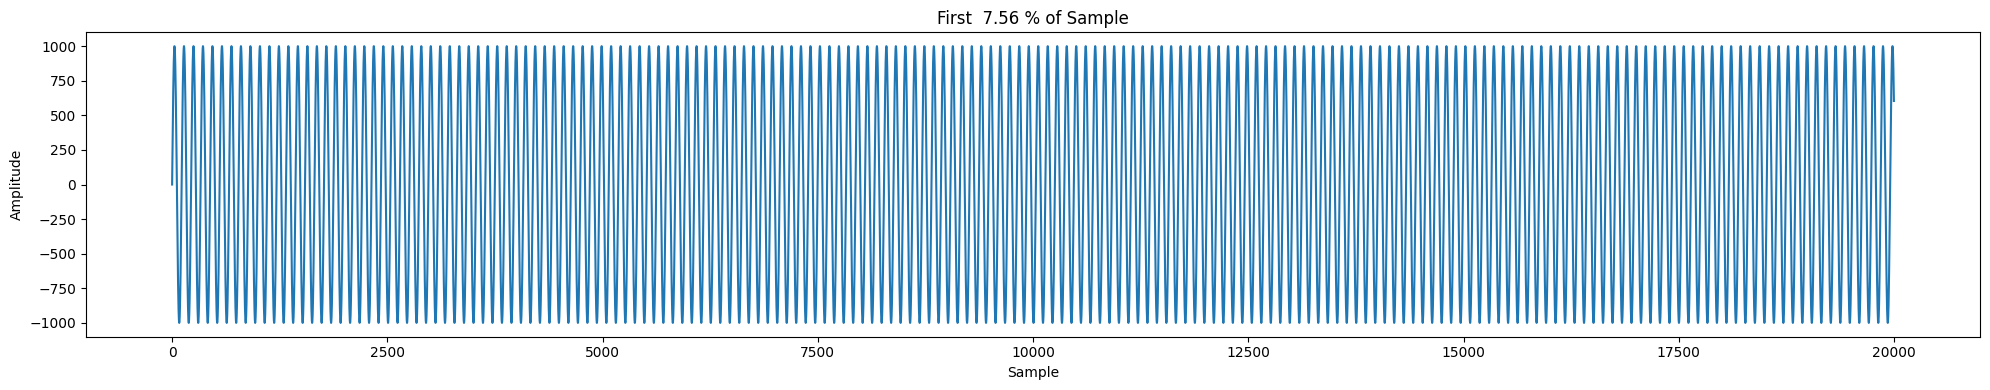

In [13]:
sample_frequency = 44100#44100 #sample frequency
signal_frequency = 400#signal frequency

fd = 1000*np.sin(2*np.pi*np.arange(sample_frequency*6)*signal_frequency/sample_frequency)
amount_to_plot = signal_frequency*50

fig = plt.figure(figsize=(20, 4))
plt.plot(fd[:amount_to_plot])
plt.title(f'First {amount_to_plot / len(fd) * 100: .2f} % of Sample')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.tight_layout()


Audio(fd,rate=sample_frequency)

## Exercise 2: Speech signals

The following code loads and plots the pre-recorded sound file "sofa.wav". The code plots the loudness (amplitude) of the sound wave as function of both the sample number and time.

- Recognize and describe the components of the individual recorded sounds. 

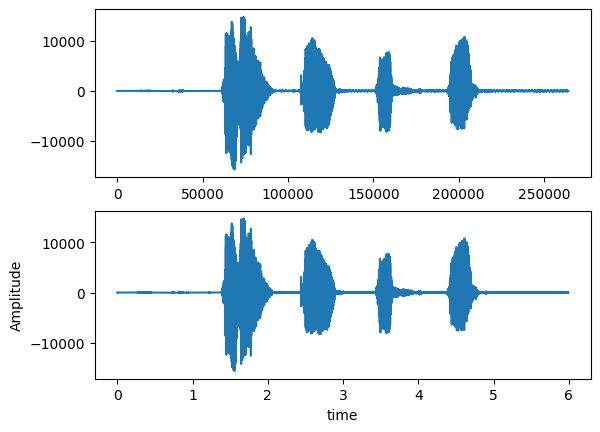

In [3]:
Fs, data = read("sofa.wav")
f = np.array(data[1:, 0],dtype=float)   # Indexed to make N odd


plt.figure()
plt.subplot(2, 1, 1)
plt.plot(f)
plt.subplot(2, 1, 2)
time_array = np.linspace(0, f.size / Fs, f.size)
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.plot(time_array, f)

Audio(f,rate = Fs)

## Exercise 3: Spectrograms

The amplitudes describe the relative difference in loudness (where zero is silence).
The analog audio signal can be considered a composition of many single-frequency signals that propagate together through the air. The recorded amplitudes hence capture the sum of these signals at specific sample-points, but does not directly informs us of the multiple frequencies that make up the signal.

- zoom in and inspect the amplitude-time plot for the "sofa" sound file, and identify the periodic structure of the sound wave at different sound components in the sound clip.

To better understand the underlying composition of the sound signal, we want to identify the constituent frequencies that make up the signal. By transforming the signal into the frequecy-domain, the frequencies can be visualized in a specific plot called a spectrogram, which shows frequency content over time. In the spectrogram, the first axis represents time, the second axis represents frequencies and colors represent the amplitude of the frequencies at the specific times.

The following code generates a spectogram for the "sofa" sound file. It uses an optimized estimation for generating the spectogram. The operation is similar to projecting on periodic function basis vectors, but optimized for speed and performance. In particular it uses optimized methods for estimation of frequency content in overlapping windows (https://www.dspguide.com/ch9/1.htm).

- Discuss the information conveyed by the spectrogram? 
- For which time windows and frequencies is the spectrogram estimated? What are the (matrix) dimensions of spectrogram?
Compare with the size of the window and the overlap
- Recognize and described the sound components (phonemes) appearing in the spectrogram of the recording "s$\cdot$o$\cdot$f$\cdot$a"? 


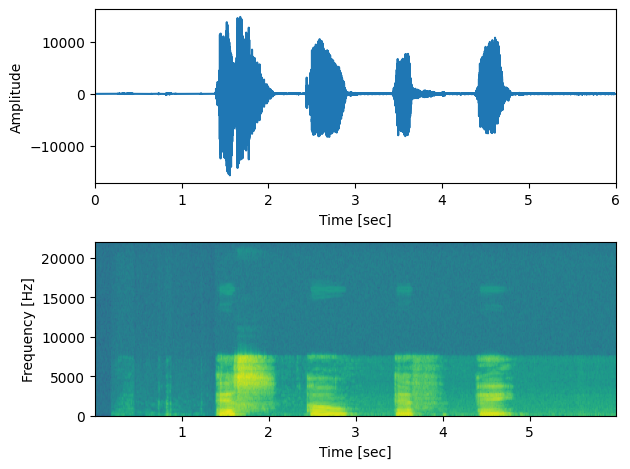

In [4]:
fig = plt.figure()
plt.subplot(2, 1, 1)
plt.plot(time_array, f)
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude')
plt.xlim([0, 6])
plt.subplot(2, 1, 2)
plt.specgram(f,NFFT=256,noverlap=128, Fs=Fs, cmap='viridis')
# NFFT:  size of window in samples. noverlap: size of overlap between windows in samples. 
plt.xlabel('Time [sec]')
plt.ylabel('Frequency [Hz]')
plt.tight_layout()

## Exercise 4: Frequency Filtering
Next we are going to filter signals to enhance certain frequency content. Typical applications involve  low-pass, high-pass, band-stop and band-pass filtering, where a "band" refers to a certain frequency range. Low-pass filter can reduce noise, high-pass filters can eliminate slowly varying "trends" in signals. Band-stop filters can be used for eliminating certain unwanted frequencies such as generated by a 50Hz power outlet. Band-pass filters can be used to detect specific frequencies, such as the $\alpha-$rhytm in brain waves. Our experiments in filtering will be based on our own sound recordings. 

We will use professional grade filters in the experiments, the operation is similar to projecting on periodic functoin basis vectors, but optimized for speed and performance. In particular we will use the so-called butterworth filters (see https://www.dspguide.com/ch20/1.htm and https://en.wikipedia.org/wiki/Butterworth_filter for additional references)that have been optimized for sensitivity to the pass frequencies, while effectively rejecting the stop frequencies.

#### Low pass filtering: Let the $low$ frequencies pass!
For low pass filtering, we set a "cutoff frequency", which defines the boundary between the frequencies being filtered away and the frequencies being kept in the signal. We use a butterworth filter of order 8. 
- Start with a $\textit{cutoff}=1000$ Hz and look at the corresponding spectrogram. Change the cutoff and discuss the changes to the spectrogram. 
- Comment on the change in sound when playing the filtered signal for different cutoffs
- Try to add a sine-wave to the signal and inspect how it can be removed by filtering. Comment on this for different frequencies of the sine-wave. Also, evaluate the effect of changing the 'order' parameter in the butterworth filter. 

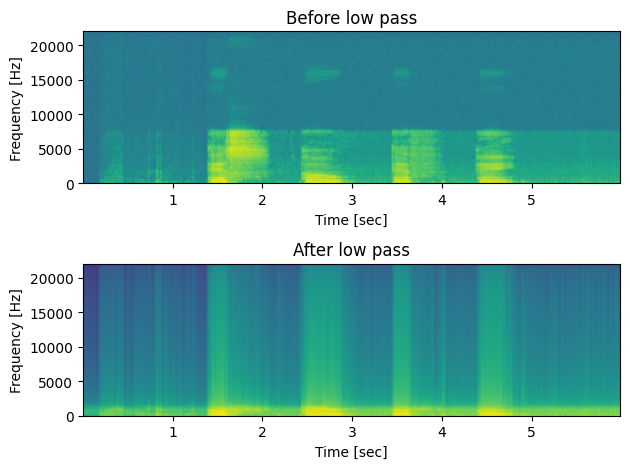

In [5]:
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a
def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

signal = f #use the 'sofa' sound file
#add sine-wave to the signal
signal_frequency = 800
signal = f #+ 1000*np.sin(2*np.pi*np.arange(f.size)*signal_frequency/Fs)

cutoff = 1000  
signal_lp_filt = butter_lowpass_filter(signal, cutoff, Fs, 8)

fig = plt.figure()
plt.subplot(2, 1, 1)
plt.specgram(signal, Fs=Fs) 
plt.title("Before low pass")
plt.xlabel('Time [sec]') 
plt.ylabel('Frequency [Hz]') 
plt.subplot(2, 1, 2)
plt.specgram(signal_lp_filt, Fs=Fs) 
plt.title("After low pass")
plt.xlabel('Time [sec]') 
plt.ylabel('Frequency [Hz]') 
plt.tight_layout()

Audio(signal_lp_filt,rate = Fs)

#### High pass filtering: Let the $high$ frequencies pass!
For high pass filtering, we set --- as before --- a cutoff frequency, which defines our boundary between the frequencies being filtered away and the ones kept. Again, we use a butterworth filter of order 8. Start with a $cutoff=2500$ Hz and look at the corresponding spectrogram. Change the cutoff and see how this changes the spectrogram. 

- Can you explain what is going on in the spectrogram when changing the cutoff frequency?
- How is this different from the low pass filter?

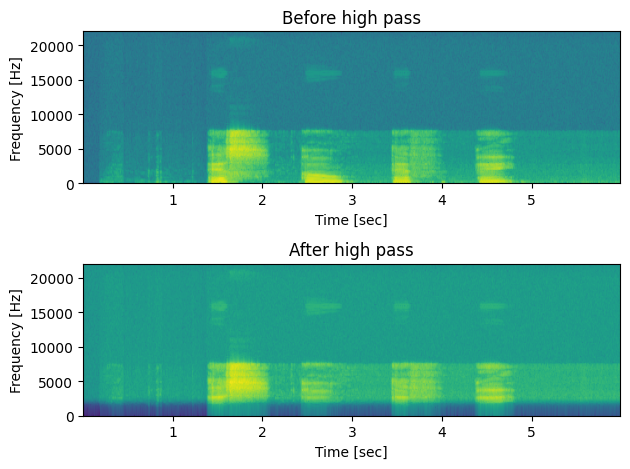

In [6]:
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a
def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

signal = f #use the 'sofa' sound file

cutoff = 2500
signal_hp_filt = butter_highpass_filter(signal, cutoff, Fs, 8)

fig = plt.figure()
plt.subplot(2, 1, 1)
plt.specgram(signal, Fs=Fs) 
plt.title("Before high pass")
plt.xlabel('Time [sec]') 
plt.ylabel('Frequency [Hz]') 
plt.subplot(2, 1, 2)
plt.specgram(signal_hp_filt, Fs=Fs) 
plt.title("After high pass")
plt.xlabel('Time [sec]') 
plt.ylabel('Frequency [Hz]') 
plt.tight_layout()

Audio(signal_hp_filt,rate = Fs)

### Play the filtered signals
The following code generates a the low passed and high passed signal of the "sofa" sound file.

- Recognize the filtered versions of the signals. Compare the signals and explain the differences to the original recorded signal.

In [7]:
import time
t = time.time()
signal = f

lp_cutoff = 1000  
signal_lp_filt = butter_lowpass_filter(signal, lp_cutoff, Fs, 8)
hp_cutoff = 2500
signal_hp_filt = butter_highpass_filter(signal, hp_cutoff, Fs, 8)
time_time_domain = time.time() - t

In [8]:
Audio(signal_lp_filt, rate=Fs)

In [9]:
Audio(signal_hp_filt, rate=Fs)

## Exercise 5: Filtering in the frequency domain
**1. The filters we have just worked with were applied in the time domain, let's now implement the equivalent in the frequency domain.** 


In [10]:
def create_basis(N):
    
    assert N % 2 == 1
    
    ns = np.arange(N)
    V = np.zeros((N,N))
        
    # first basis vector
    V[:,0] = np.ones(N)
    
    # remaining basis vectors
    n_pairs = int((N-1)/2)
    for k in range(1,n_pairs + 1):
        # in each column we are going to define cosine or sine function with frequency k
        V[:,2*k-1] = np.sqrt(2)*np.cos(2*np.pi*ns/N*k) ## at each step we are filling this is a column
        V[:,2*k] = np.sqrt(2)*np.sin(2*np.pi*ns/N*k)
    
    # scale all vectors
    V = V/np.sqrt(N)
    return V

In [11]:
def highpass_filter(signal, threshold, sample_rate):
    N = len(signal)
    n_pairs = int((N-1)/2)
    freqs = np.arange(int(0.5*N)+1) * sample_rate / N
    
    V = create_basis(N=N)
    z = V.T @ signal
    
    spec_highpass_mask = 1.0*(freqs > threshold)
    z_highpass_mask = np.zeros(N)
    for k in range(1, n_pairs):
        z_highpass_mask[2*k] = spec_highpass_mask[k]
        z_highpass_mask[2*k-1] = spec_highpass_mask[k]
    z_highpass_mask[0] = spec_highpass_mask[0]
    
    
    # filter
    z_hp = z*z_highpass_mask
    y_hp = V@z_hp
    return y_hp

In [12]:
def lowpass_filter(signal, threshold, sample_rate):
    N = len(signal)
    n_pairs = int((N-1)/2)
    freqs = np.arange(int(0.5*N)+1) * sample_rate / N
    
    V = create_basis(N=N)
    z = V.T @ signal
    # define mask for amplitude spectrum
    spec_lowpass_mask = freqs < threshold
    
    # convert to z representation
    z_lowpass_mask = np.zeros(N)
    for k in range(1, n_pairs):
        z_lowpass_mask[2*k] = spec_lowpass_mask[k]
        z_lowpass_mask[2*k-1] = spec_lowpass_mask[k]    
    z_lowpass_mask[0] = spec_lowpass_mask[0]
    
    # perform the filtering in the frequency domain
    z_lp = z*z_lowpass_mask
    
    # map back to time-domain representation
    y_lp = V@z_lp
    
    # Return the mask for plotting purposes
    return y_lp

In [13]:
signal = f
# a try except block is attempts to run the code in the try, 
# if an exception is thrown while doing so, this exception 
# can be 'caught' by the except block and handled without
# crashing. Look it up or ask for further explanation if needed.
try:
    signal_lp_filt_frequency_domain = lowpass_filter(signal, lp_cutoff, Fs)
    signal_hp_filt_frequency_domain = highpass_filter(signal, hp_cutoff, Fs)
except MemoryError as e:
    print(f'{e}')

Unable to allocate 520. GiB for an array with shape (264191, 264191) and data type float64


**2. You will encounter a problem with memory allocation (unless you have ~520 GB of RAM) when running this code for filtering in the time domain. Explain why this occurs and come up with a potential solution. (This exercise suggests a potential solution, do not look any further if you wish to come up with you own.)**















In [14]:
from tqdm.notebook import tqdm


def filter_signal_in_chunks(signal, cutoff, sample_rate, filter_type='low', chunk_length=5_001):
    filter_function = highpass_filter if filter_type.startswith('high') else lowpass_filter
    
    signal_filtered = np.empty_like(signal)
    for i in tqdm(range(0, len(signal), chunk_length), desc='Filtering signal'):
        signal_filtered[i:i+chunk_length] = filter_function(signal[i:i+chunk_length], cutoff, sample_rate)
    
    return signal_filtered

In [15]:
signal_lp_filt_frequency_domain = filter_signal_in_chunks(signal, lp_cutoff, Fs, filter_type='low')

Filtering signal:   0%|          | 0/53 [00:00<?, ?it/s]

In [16]:
signal_hp_filt_frequency_domain = filter_signal_in_chunks(signal, hp_cutoff, Fs, filter_type='high')

Filtering signal:   0%|          | 0/53 [00:00<?, ?it/s]

In [17]:
Audio(signal_lp_filt_frequency_domain, rate=Fs)

In [18]:
Audio(signal_hp_filt_frequency_domain, rate=Fs)

**3. As we have seen before in this course, using our own implementations for common operations is typically and order of magnitude slower that library functions that have been optimised and this case is no different. Use Scipy's fftpack to implement efficient high and lowpass filters**

In [19]:
from scipy.fftpack import rfft, fftfreq, irfft
def scipy_filter(signal, cutoff, sample_rate, filter_type='low'):
    W = fftfreq(signal.size, d=1/sample_rate)
    signal_frequency_domain = rfft(signal)
        
    mask = (W<cutoff) if filter_type.startswith('high') else (cutoff < W)
    signal_frequency_domain[mask] = 0
    # Now return to the time domain
    signal_filtered = irfft(signal_frequency_domain)
    return signal_filtered

In [20]:
scipy_lowpass_filtered_signal = scipy_filter(signal, lp_cutoff, Fs, filter_type='low')
scipy_highpass_filtered_signal = scipy_filter(signal, lp_cutoff, Fs, filter_type='low')

In [21]:
Audio(scipy_lowpass_filtered_signal, rate=Fs)

In [22]:
Audio(scipy_highpass_filtered_signal, rate=Fs)

*The difference in time it takes to do the two* 

## Exercise 6: Analysis of letters and phonemes

### Extract each letter

The "sofa" sond file contains the four spoken letters  's', 'o', 'f' and 'a'. We can extract the sound clips for the individual letters by identifying the range of samples that corresponds to the letters.


In [23]:
start_s,end_s = 57000,93910  
start_o,end_o = 103871,135510  
start_f,end_f = 147814,181211  
start_a,end_a = 190000,219295  

sound_s = signal[start_s:end_s]
sound_o = signal[start_o:end_o]
sound_f = signal[start_f:end_f]
sound_a = signal[start_a:end_a]

### Plot each letter
The following code plots the time series for each letter. 
- Recognize the part of the time series that makes up the sounds of the individual letters. 
- Discuss the frequency content of the two components of the  $s$-sound. 
- Implement the code to plot the spectograms for each sound. Are there any common patterns in the spectograms for the different sounds?

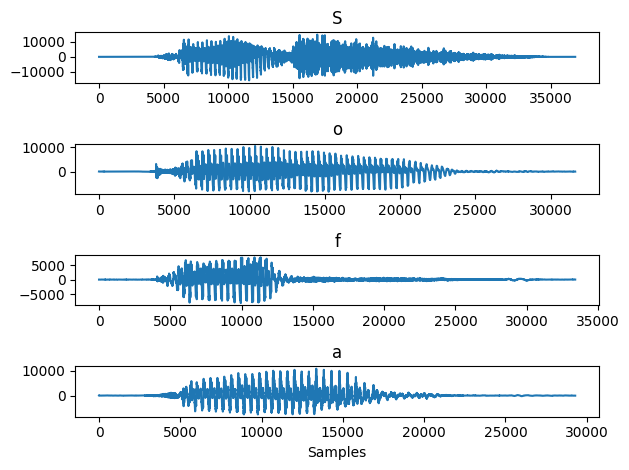

In [24]:
fig = plt.figure()
plt.subplot(4, 1, 1)
plt.title("S")
plt.plot(sound_s) 
plt.subplot(4, 1, 2)
plt.title("o")
plt.plot(sound_o) 
plt.subplot(4, 1, 3)
plt.title("f")
plt.plot(sound_f) 
plt.subplot(4, 1, 4)
plt.title("a")
plt.plot(sound_a) 

plt.xlabel('Samples') 
plt.tight_layout()

In [25]:
Audio(sound_s, rate=Fs)

In [26]:
Audio(sound_o, rate=Fs)

In [27]:
Audio(sound_f, rate=Fs)

In [28]:
Audio(sound_a, rate=Fs)

### Identify the fundamental frequency (grundtone) of the voice
Speech is a sequence of voice and unvoiced sounds, produced by the  speech organs. The voiced sounds are produced by a vibrating vocal cord, hence, presents both a fundamental frequency and high harmonics. The fundamental frequency is also referred to as the pitch.  What creates each specific sound is the combination of harmonics the power disribution among them. This could also be seen from the spectrograms of the different sounds in "sofa"  each letter has a special frequency composition and when put together we can make words and sentences. However, imagine you recorded a deep voice saying "sofa" and a high voice saying "sofa"; they have the same semantics yet, sound very different. 

From the time series of the "sofa" file, we can measure the pitch in Hertz (Hertz is the number of cycles pr. second). This pitch frequency can be estimated by visual inspection of the time series. Zoom in on on a part of the signal. Estimate the uncertainty of the measured frequency, possibly by repeting the measurement.

The pitch is highly variable in the population with some differences between the genders, and variability due to physical height differences. 

110.25 Hz


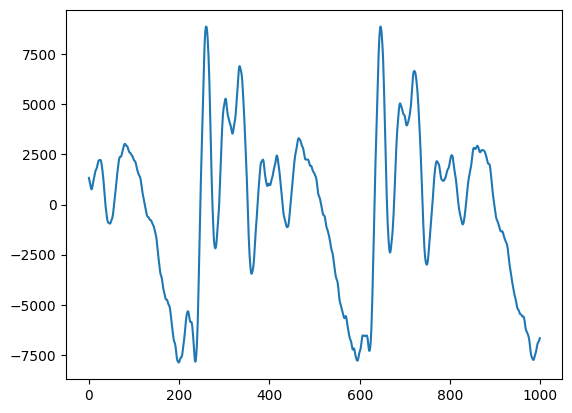

In [29]:
#est_pitch = [] # put your answer here in Hz

#Solution
#By visual inspection of Fig. 3., we find the number of periods per second. Zooming 
#in on "o" from sample 7000 to 8000, we see that one period takes approx. 400 samples.
#(in order to be able to zoom in on the figure, you might have to rerun the script, which
#allows you to use the interactive 'zoom to rectangle' button)
#Having 1 period each 400 sample we can estimate how many periods occur each second
#by dividing the sampling frequency with 400: 

plt.figure()
plt.plot(sound_o[7000:8000])

est_pitch = Fs/400
print(str(est_pitch) + " Hz")



### Extract phonemes
The pronunciation of the single letter words $s$ and $f$ have one phoneme (sound component) in common. The phoneme is often listed with the symbol: $/\epsilon /$.
The code below extracts the first phoneme in $s$ and $f$. 

- Listen to the two clisps of the phoneme and comment on their similarity.
- Compare the signals for the two clips by plotting and inspecting their amplitude-time plots and spectograms.

In [30]:
start_s_e,end_s_e = 4210,14224
start_f_e,end_f_e = 3800,13081

sound_s_e = sound_s[start_s_e:end_s_e]
sound_f_e = sound_s[start_f_e:end_f_e]

In [31]:
Audio(sound_s_e, rate=Fs)

In [32]:
Audio(sound_f_e, rate=Fs)